In [1]:
#importing libraries
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
from scipy import linalg
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
#reading csv
df = pd.read_csv("Mumbai1.csv")

In [3]:
df

,0,Price,Area,Location,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
0,0,4850000,720,Kharghar,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0
1,1,4500000,600,Kharghar,1,0,1,1,1,1,1,0,1,0,0,0,0,1,1
2,2,6700000,650,Kharghar,1,0,1,1,1,1,1,1,1,1,0,0,0,1,1
3,3,4500000,650,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0
4,4,5000000,665,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6342,6342,2485000,700,Shirgaon,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6343,6343,14500000,900,Thane West,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6344,6344,14500000,900,Thane West,2,0,0,1,0,0,0,0,0,1,0,0,1,0,0
6345,6345,4100000,1380,Boisar,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
#dropping unnecessary columns
df2 = df.drop(["Children's Play Area",'Intercom','Landscaped Gardens','Indoor Games','Maintenance Staff','24x7 Security'],axis = 'columns')
df2

,0,Price,Area,Location,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Clubhouse,Gas Connection,Jogging Track,Swimming Pool
0,0,4850000,720,Kharghar,1,0,0,1,1,0,0,0,0
1,1,4500000,600,Kharghar,1,0,1,1,1,1,0,1,1
2,2,6700000,650,Kharghar,1,0,1,1,1,1,0,1,1
3,3,4500000,650,Kharghar,1,0,0,1,1,0,0,0,0
4,4,5000000,665,Kharghar,1,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6342,6342,2485000,700,Shirgaon,1,1,0,0,0,0,0,0,0
6343,6343,14500000,900,Thane West,2,0,0,0,0,0,0,0,0
6344,6344,14500000,900,Thane West,2,0,0,1,0,0,1,0,0
6345,6345,4100000,1380,Boisar,3,0,0,0,0,0,0,0,0


In [5]:
#cleaning
df2.isnull().sum()

0                  0
Price              0
Area               0
Location           0
No. of Bedrooms    0
New/Resale         0
Gymnasium          0
Lift Available     0
Car Parking        0
Clubhouse          0
Gas Connection     0
Jogging Track      0
Swimming Pool      0
dtype: int64

In [6]:
#checking "Area" column
df2['Area'].unique()

array([ 720,  600,  650, ...,  250, 1162,  435], dtype=int64)

In [7]:
df2['Price'].unique()

array([  4850000,   4500000,   6700000,   5000000,  17000000,  12500000,
        10500000,  15000000,   8700000,   9000000,  11000000,   9700000,
         8000000,   8500000,   9300000,   9900000,   4200000,  28000000,
        40000000,  16000000,   9500000,   7500000,  13000000,  13700000,
         7700000,   6000000,   6200000,   6500000,   5200000,   5500000,
        16500000,  11399999,  13500000,  22500000,   5700000,   4800000,
         4300000,   5300000,   4803000,  15500000,   9400000,   5600000,
        17500000,  12000000,  16600000,   4900000,  22000000,  17800000,
        14000000,   7200000,   7000000,  10000000,   6900000,   8300000,
         5100000,   5400000,  17100000,  11800000,   4100000,  19000000,
        13600000,   8600000,   4700000,  16200000,  13200000,  11600000,
         2018000,  65000000,  45000000,   2375000,  19500000,   2000000,
         2500000,   2250000,   2700000,  43500000,   4760000,  18100000,
        23800000,  21200000,  36500000,  23700000, 

In [8]:
#checking "New/Resale" column
df2['New/Resale'].unique()

array([0, 1], dtype=int64)

In [9]:
#checking "No. of Bedrooms" column
df2['No. of Bedrooms'].unique()

array([1, 4, 3, 2, 5, 6, 7], dtype=int64)

In [10]:
#replacing 'no. of bedrooms' by 'bhk'
df2['bhk'] = df2['No. of Bedrooms'] 

In [11]:
df3 = df2.drop(['No. of Bedrooms'],axis = 'columns')

In [12]:
df3

,0,Price,Area,Location,New/Resale,Gymnasium,Lift Available,Car Parking,Clubhouse,Gas Connection,Jogging Track,Swimming Pool,bhk
0,0,4850000,720,Kharghar,0,0,1,1,0,0,0,0,1
1,1,4500000,600,Kharghar,0,1,1,1,1,0,1,1,1
2,2,6700000,650,Kharghar,0,1,1,1,1,0,1,1,1
3,3,4500000,650,Kharghar,0,0,1,1,0,0,0,0,1
4,4,5000000,665,Kharghar,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6342,6342,2485000,700,Shirgaon,1,0,0,0,0,0,0,0,1
6343,6343,14500000,900,Thane West,0,0,0,0,0,0,0,0,2
6344,6344,14500000,900,Thane West,0,0,1,0,0,1,0,0,2
6345,6345,4100000,1380,Boisar,0,0,0,0,0,0,0,0,3


In [13]:
#defining a function that will help in finding float values in a column
def find_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [14]:
df3[~df3['Area'].apply(find_float)]

,0,Price,Area,Location,New/Resale,Gymnasium,Lift Available,Car Parking,Clubhouse,Gas Connection,Jogging Track,Swimming Pool,bhk


In [15]:
df3[~df3['Price'].apply(find_float)]

,0,Price,Area,Location,New/Resale,Gymnasium,Lift Available,Car Parking,Clubhouse,Gas Connection,Jogging Track,Swimming Pool,bhk


In [16]:
#feature eng
#calculating price per area
df4 = df3.copy()
df4['price_per_sqft'] = df4['Price']/df4['Area']
df4

,0,Price,Area,Location,New/Resale,Gymnasium,Lift Available,Car Parking,Clubhouse,Gas Connection,Jogging Track,Swimming Pool,bhk,price_per_sqft
0,0,4850000,720,Kharghar,0,0,1,1,0,0,0,0,1,6736.111111
1,1,4500000,600,Kharghar,0,1,1,1,1,0,1,1,1,7500.000000
2,2,6700000,650,Kharghar,0,1,1,1,1,0,1,1,1,10307.692308
3,3,4500000,650,Kharghar,0,0,1,1,0,0,0,0,1,6923.076923
4,4,5000000,665,Kharghar,0,0,1,1,0,0,0,0,1,7518.796992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6342,6342,2485000,700,Shirgaon,1,0,0,0,0,0,0,0,1,3550.000000
6343,6343,14500000,900,Thane West,0,0,0,0,0,0,0,0,2,16111.111111
6344,6344,14500000,900,Thane West,0,0,1,0,0,1,0,0,2,16111.111111
6345,6345,4100000,1380,Boisar,0,0,0,0,0,0,0,0,3,2971.014493


In [17]:
#checking uniques in 'location'
df4.Location.unique()

array(['Kharghar', 'Sector-13 Kharghar', 'Sector 18 Kharghar',
       'Sector 20 Kharghar', 'Sector 15 Kharghar', 'Dombivali',
       'Churchgate', 'Prabhadevi', 'Jogeshwari West', 'Kalyan East',
       'Malad East', 'Virar East', 'Virar', 'Malad West', 'Borivali East',
       'Mira Road East', 'Goregaon West', 'Kandivali West',
       'Borivali West', 'Kandivali East', 'Andheri East', 'Goregaon East',
       'Wadala', 'Ulwe', 'Dahisar', 'kandivali', 'Goregaon',
       'Bhandup West', 'thakur village kandivali east', 'Santacruz West',
       'Kanjurmarg', 'I C Colony', 'Dahisar W', 'Marol', 'Parel',
       'Lower Parel', 'Worli', 'Jogeshwari East', 'Chembur Shell Colony',
       'Central Avenue', 'Chembur East', 'Diamond Market Road', 'Mulund',
       'Nalasopara West', 'raheja vihar', 'Powai Lake', 'MHADA Colony 20',
       'Tolaram Colony', 'Taloja', 'Thane West', 'Vangani',
       'Sector 5 Ulwe', 'Sector12 New Panvel', 'Sector 17 Ulwe',
       'Sector9 Kamothe', 'Sector 19 Kharghar

In [18]:
len(df4.Location.unique())

413

In [19]:
#checking entries per location
df4.Location = df4.Location.apply(lambda x: x.strip())
location_stats = df4.groupby('Location')['Location'].agg('count').sort_values(ascending=False)
location_stats

Location
Kharghar                533
Thane West              418
Mira Road East          390
Ulwe                    319
Kalyan West             176
                       ... 
Poonam Sagar Complex      1
Pokhran Road No 2         1
Pokharan Road             1
Poddar Road               1
15th Road                 1
Name: Location, Length: 413, dtype: int64

In [20]:
location_stats_other = location_stats[location_stats<=10]
location_stats_other

Location
Sion                    10
Majiwada                10
Sector 19 Kharghar      10
kandivali                9
Hiranandani Estates      9
                        ..
Poonam Sagar Complex     1
Pokhran Road No 2        1
Pokharan Road            1
Poddar Road              1
15th Road                1
Name: Location, Length: 324, dtype: int64

In [21]:
len(location_stats_other)

324

In [22]:
df5 = df4.copy()

In [23]:
df5.Location = df5.Location.apply(lambda x: 'other' if x in location_stats_other else x)

In [24]:
df5

,0,Price,Area,Location,New/Resale,Gymnasium,Lift Available,Car Parking,Clubhouse,Gas Connection,Jogging Track,Swimming Pool,bhk,price_per_sqft
0,0,4850000,720,Kharghar,0,0,1,1,0,0,0,0,1,6736.111111
1,1,4500000,600,Kharghar,0,1,1,1,1,0,1,1,1,7500.000000
2,2,6700000,650,Kharghar,0,1,1,1,1,0,1,1,1,10307.692308
3,3,4500000,650,Kharghar,0,0,1,1,0,0,0,0,1,6923.076923
4,4,5000000,665,Kharghar,0,0,1,1,0,0,0,0,1,7518.796992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6342,6342,2485000,700,other,1,0,0,0,0,0,0,0,1,3550.000000
6343,6343,14500000,900,Thane West,0,0,0,0,0,0,0,0,2,16111.111111
6344,6344,14500000,900,Thane West,0,0,1,0,0,1,0,0,2,16111.111111
6345,6345,4100000,1380,Boisar,0,0,0,0,0,0,0,0,3,2971.014493


In [25]:
len(df5.Location.unique())

90

In [26]:
#remove outliers
#assume 1bhk to occupy atleast 350sqft
df5[df5['Area']/(df5['bhk'])<350]

,0,Price,Area,Location,New/Resale,Gymnasium,Lift Available,Car Parking,Clubhouse,Gas Connection,Jogging Track,Swimming Pool,bhk,price_per_sqft
236,236,2300000,310,Kharghar,0,0,0,0,0,0,0,0,1,7419.354839
239,239,11200000,573,Ulwe,1,1,1,1,1,0,1,1,2,19546.247818
259,259,2500000,300,Kandivali East,1,0,0,0,0,0,0,0,1,8333.333333
269,269,32500000,997,other,0,0,1,1,0,0,0,0,3,32597.793380
340,340,21000000,620,other,0,0,0,1,0,0,0,0,2,33870.967742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6319,6319,5500000,580,Kharghar,0,0,0,0,0,0,0,0,2,9482.758621
6331,6331,39500000,940,other,0,0,1,0,0,1,0,0,3,42021.276596
6332,6332,39000000,940,other,0,0,1,0,0,1,0,0,3,41489.361702
6333,6333,38500000,985,other,0,0,1,0,0,0,0,0,3,39086.294416


In [27]:
#removing rows with area/bhk less than 350
df6 = df5[~(df5['Area']/(df5['bhk'])<350)]
df6

,0,Price,Area,Location,New/Resale,Gymnasium,Lift Available,Car Parking,Clubhouse,Gas Connection,Jogging Track,Swimming Pool,bhk,price_per_sqft
0,0,4850000,720,Kharghar,0,0,1,1,0,0,0,0,1,6736.111111
1,1,4500000,600,Kharghar,0,1,1,1,1,0,1,1,1,7500.000000
2,2,6700000,650,Kharghar,0,1,1,1,1,0,1,1,1,10307.692308
3,3,4500000,650,Kharghar,0,0,1,1,0,0,0,0,1,6923.076923
4,4,5000000,665,Kharghar,0,0,1,1,0,0,0,0,1,7518.796992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6342,6342,2485000,700,other,1,0,0,0,0,0,0,0,1,3550.000000
6343,6343,14500000,900,Thane West,0,0,0,0,0,0,0,0,2,16111.111111
6344,6344,14500000,900,Thane West,0,0,1,0,0,1,0,0,2,16111.111111
6345,6345,4100000,1380,Boisar,0,0,0,0,0,0,0,0,3,2971.014493


In [28]:
df6.price_per_sqft.describe()

count      5896.000000
mean      13199.743834
std        9471.416643
min        1597.444089
25%        7052.631579
50%       10000.000000
75%       16752.136752
max      109950.522265
Name: price_per_sqft, dtype: float64

In [29]:
#checking price per sqft for a location
df5[(df5['Location']=='Kharghar')]

,0,Price,Area,Location,New/Resale,Gymnasium,Lift Available,Car Parking,Clubhouse,Gas Connection,Jogging Track,Swimming Pool,bhk,price_per_sqft
0,0,4850000,720,Kharghar,0,0,1,1,0,0,0,0,1,6736.111111
1,1,4500000,600,Kharghar,0,1,1,1,1,0,1,1,1,7500.000000
2,2,6700000,650,Kharghar,0,1,1,1,1,0,1,1,1,10307.692308
3,3,4500000,650,Kharghar,0,0,1,1,0,0,0,0,1,6923.076923
4,4,5000000,665,Kharghar,0,0,1,1,0,0,0,0,1,7518.796992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6190,6190,13000000,1050,Kharghar,1,1,1,1,1,0,1,1,2,12380.952381
6270,6270,6500000,650,Kharghar,0,1,1,1,1,0,1,1,1,10000.000000
6274,6274,7700000,1162,Kharghar,0,0,0,0,0,0,0,0,2,6626.506024
6319,6319,5500000,580,Kharghar,0,0,0,0,0,0,0,0,2,9482.758621


In [30]:
#defining a function to remove outliers
def remove_outliers_pps(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('Location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [31]:
df7 = remove_outliers_pps(df6)
df7

,0,Price,Area,Location,New/Resale,Gymnasium,Lift Available,Car Parking,Clubhouse,Gas Connection,Jogging Track,Swimming Pool,bhk,price_per_sqft
0,1145,14900000,1245,Airoli,1,0,1,1,0,1,0,0,2,11967.871486
1,1146,14000000,1183,Airoli,1,1,1,1,1,0,1,1,2,11834.319527
2,1884,14800000,1245,Airoli,0,0,1,1,0,0,0,0,2,11887.550201
3,4105,11100000,1050,Airoli,0,0,1,0,0,1,0,0,2,10571.428571
4,4148,7500000,600,Airoli,0,0,1,0,1,1,1,0,1,12500.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4620,6012,13899999,1200,other,0,0,1,0,1,1,0,0,2,11583.332500
4621,6123,4260000,695,other,1,0,1,0,0,0,0,0,1,6129.496403
4622,6238,3500000,650,other,0,0,1,1,0,1,0,0,1,5384.615385
4623,6339,2465000,700,other,1,0,0,0,0,0,0,0,1,3521.428571


In [32]:
df8 = df7.drop(['price_per_sqft'],axis='columns')
df8

,0,Price,Area,Location,New/Resale,Gymnasium,Lift Available,Car Parking,Clubhouse,Gas Connection,Jogging Track,Swimming Pool,bhk
0,1145,14900000,1245,Airoli,1,0,1,1,0,1,0,0,2
1,1146,14000000,1183,Airoli,1,1,1,1,1,0,1,1,2
2,1884,14800000,1245,Airoli,0,0,1,1,0,0,0,0,2
3,4105,11100000,1050,Airoli,0,0,1,0,0,1,0,0,2
4,4148,7500000,600,Airoli,0,0,1,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4620,6012,13899999,1200,other,0,0,1,0,1,1,0,0,2
4621,6123,4260000,695,other,1,0,1,0,0,0,0,0,1
4622,6238,3500000,650,other,0,0,1,1,0,1,0,0,1
4623,6339,2465000,700,other,1,0,0,0,0,0,0,0,1


In [33]:
#one hot encoding/dummy
#creating a dummy df with locations as columns
dummies = pd.get_dummies(df8.Location)
dummies

,Airoli,Ambernath East,Ambernath West,Andheri,Andheri East,Andheri West,Badlapur East,Bandra East,Bandra West,Belapur,...,Ville Parle East,Virar,Virar East,Virar West,Wadala,Wadala East Wadala,Worli,matunga east,mumbai,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4620,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4621,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4622,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4623,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [34]:
#concatinating dummies with our df
df9 = pd.concat([df8,dummies.drop('other',axis='columns')],axis='columns')
df9

,0,Price,Area,Location,New/Resale,Gymnasium,Lift Available,Car Parking,Clubhouse,Gas Connection,...,Vashi,Ville Parle East,Virar,Virar East,Virar West,Wadala,Wadala East Wadala,Worli,matunga east,mumbai
0,1145,14900000,1245,Airoli,1,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1146,14000000,1183,Airoli,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1884,14800000,1245,Airoli,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4105,11100000,1050,Airoli,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,4148,7500000,600,Airoli,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4620,6012,13899999,1200,other,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4621,6123,4260000,695,other,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4622,6238,3500000,650,other,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4623,6339,2465000,700,other,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
df9 = pd.concat([df8,dummies.drop('other',axis='columns')],axis='columns')
df9

,0,Price,Area,Location,New/Resale,Gymnasium,Lift Available,Car Parking,Clubhouse,Gas Connection,...,Vashi,Ville Parle East,Virar,Virar East,Virar West,Wadala,Wadala East Wadala,Worli,matunga east,mumbai
0,1145,14900000,1245,Airoli,1,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1146,14000000,1183,Airoli,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1884,14800000,1245,Airoli,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4105,11100000,1050,Airoli,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,4148,7500000,600,Airoli,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4620,6012,13899999,1200,other,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4621,6123,4260000,695,other,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4622,6238,3500000,650,other,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4623,6339,2465000,700,other,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
df10 = df9.drop('Location',axis='columns')
df10

,0,Price,Area,New/Resale,Gymnasium,Lift Available,Car Parking,Clubhouse,Gas Connection,Jogging Track,...,Vashi,Ville Parle East,Virar,Virar East,Virar West,Wadala,Wadala East Wadala,Worli,matunga east,mumbai
0,1145,14900000,1245,1,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1146,14000000,1183,1,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1884,14800000,1245,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4105,11100000,1050,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,4148,7500000,600,0,0,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4620,6012,13899999,1200,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4621,6123,4260000,695,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4622,6238,3500000,650,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4623,6339,2465000,700,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
#renaming column names for convenience
df10 = df10.rename(columns={'New/Resale': 'New_or_Resale',
                            'Lift Available': 'Lift_Available',
                            'Car Parking': 'Car_Parking',
                            'Gas Connection': 'Gas_Connection',
                            'Jogging Track': 'Jogging_Track',
                            'Swimming Pool': 'Swimming_Pool'})
df10

,0,Price,Area,New_or_Resale,Gymnasium,Lift_Available,Car_Parking,Clubhouse,Gas_Connection,Jogging_Track,...,Vashi,Ville Parle East,Virar,Virar East,Virar West,Wadala,Wadala East Wadala,Worli,matunga east,mumbai
0,1145,14900000,1245,1,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1146,14000000,1183,1,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1884,14800000,1245,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4105,11100000,1050,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,4148,7500000,600,0,0,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4620,6012,13899999,1200,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4621,6123,4260000,695,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4622,6238,3500000,650,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4623,6339,2465000,700,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
df10 = df10.drop('0',axis='columns')

In [39]:
#final dataset
df10

,Price,Area,New_or_Resale,Gymnasium,Lift_Available,Car_Parking,Clubhouse,Gas_Connection,Jogging_Track,Swimming_Pool,...,Vashi,Ville Parle East,Virar,Virar East,Virar West,Wadala,Wadala East Wadala,Worli,matunga east,mumbai
0,14900000,1245,1,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,14000000,1183,1,1,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,14800000,1245,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,11100000,1050,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7500000,600,0,0,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4620,13899999,1200,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4621,4260000,695,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4622,3500000,650,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4623,2465000,700,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
#training model
X = df10.drop('Price',axis='columns')
X

,Area,New_or_Resale,Gymnasium,Lift_Available,Car_Parking,Clubhouse,Gas_Connection,Jogging_Track,Swimming_Pool,bhk,...,Vashi,Ville Parle East,Virar,Virar East,Virar West,Wadala,Wadala East Wadala,Worli,matunga east,mumbai
0,1245,1,0,1,1,0,1,0,0,2,...,0,0,0,0,0,0,0,0,0,0
1,1183,1,1,1,1,1,0,1,1,2,...,0,0,0,0,0,0,0,0,0,0
2,1245,0,0,1,1,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
3,1050,0,0,1,0,0,1,0,0,2,...,0,0,0,0,0,0,0,0,0,0
4,600,0,0,1,0,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4620,1200,0,0,1,0,1,1,0,0,2,...,0,0,0,0,0,0,0,0,0,0
4621,695,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4622,650,0,0,1,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4623,700,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [41]:
y = df10.Price
y

0       14900000
1       14000000
2       14800000
3       11100000
4        7500000
          ...   
4620    13899999
4621     4260000
4622     3500000
4623     2465000
4624     2485000
Name: Price, Length: 4625, dtype: int64

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [43]:
#checking score
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)
regressor.score(X_test,y_test)

0.8730166240133534

In [44]:
X_test[0:1]

,Area,New_or_Resale,Gymnasium,Lift_Available,Car_Parking,Clubhouse,Gas_Connection,Jogging_Track,Swimming_Pool,bhk,...,Vashi,Ville Parle East,Virar,Virar East,Virar West,Wadala,Wadala East Wadala,Worli,matunga east,mumbai
208,675,1,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [45]:
regressor.predict(X_test[0:1])

array([3528954.46971792])

In [46]:
def predict_price(Location,Area,New_or_Resale,Gymnasium,Lift_Available,Car_Parking,Clubhouse,Gas_Connection,Jogging_Track,Swimming_Pool,bhk):
    loc_index = np.where(X.columns==Location)[0][0]
    x = np.zeros(len(X.columns))
    x[0] = Area
    x[1] = New_or_Resale
    x[2] = Gymnasium
    x[3] = Lift_Available
    x[4] = Car_Parking
    x[5] = Clubhouse
    x[6] = Gas_Connection
    x[7] = Jogging_Track
    x[8] = Swimming_Pool
    x[9] = bhk
    if loc_index >= 0:
        x[loc_index] = 1
    
    return regressor.predict([x])[0]

In [47]:
#defining a function to predict the price based on input from user
def predict_prices(Location,Area,New_or_Resale,Gymnasium,Lift_Available,Car_Parking,Clubhouse,Gas_Connection,Jogging_Track,Swimming_Pool,bhk):
    index=0
    for i in X.columns:
        if(X.columns[index]==Location):
            loc_index=index
            break
        index=index+1
    x = np.zeros(len(X.columns))

    x[0] = Area
    x[1] = New_or_Resale
    x[2] = Gymnasium
    x[3] = Lift_Available
    x[4] = Car_Parking
    x[5] = Clubhouse
    x[6] = Gas_Connection
    x[7] = Jogging_Track
    x[8] = Swimming_Pool
    x[9] = bhk
    if loc_index >= 0:
        x[loc_index] = 1
    return regressor.predict([x])[0]

In [48]:
predict_price('Vashi',10000,0,1,0,1,1,0,1,1,2)

196493296.48172125

In [49]:
predict_price('Kharghar',720,0,0,1,1,0,0,0,0,1)

4637016.530318784

In [50]:
predict_prices('Kharghar',720,0,0,1,1,0,0,0,0,1)

4637016.530318784

In [51]:
y_pred = regressor.predict(X_test)

In [52]:
y_pred

array([ 3.52895447e+06,  1.86615029e+07,  2.26810451e+06,  2.32354080e+07,
        1.16977324e+07,  2.34262020e+07,  7.81683900e+06,  6.62551466e+07,
        9.27027264e+06,  4.14888025e+05,  7.29398750e+06,  2.56020026e+06,
        7.86807433e+06,  1.78748842e+07,  1.69850911e+07,  1.21117721e+07,
        7.24674509e+07,  3.79741992e+06,  3.24829110e+07,  7.95025103e+07,
        3.37859826e+07,  5.31249876e+05,  1.86329039e+07,  3.43131178e+07,
        7.03225395e+06,  1.86422483e+07,  2.53239583e+07,  1.65714992e+05,
        1.42235777e+07,  1.36391242e+07,  2.36787494e+07,  1.26893460e+07,
        2.07220452e+07,  6.99140531e+06,  1.51367686e+07,  3.14427669e+06,
        9.09134259e+06,  4.48432462e+06,  2.62736447e+06,  2.30952159e+06,
        5.75944769e+07,  9.91265239e+06,  7.29221457e+06,  1.40895775e+07,
        1.58523413e+07,  1.28387944e+07,  1.32952750e+07,  4.41182354e+06,
        1.27192096e+07,  8.56285258e+07,  1.67049713e+07,  2.08952517e+06,
        7.20981511e+06,  

Text(0, 0.5, 'Price')

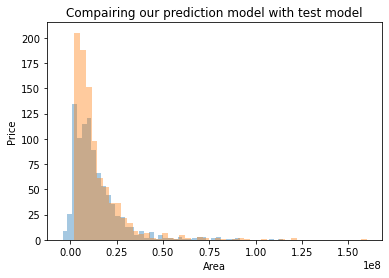

In [53]:
#using a histogram to check accuracy of our model
sns.distplot(y_pred,  kde=False, label='Prediction')
sns.distplot(y_test,  kde=False,label='Test')
plt.legend
plt.title('Compairing our prediction model with test model')
plt.xlabel('Area')
plt.ylabel('Price')

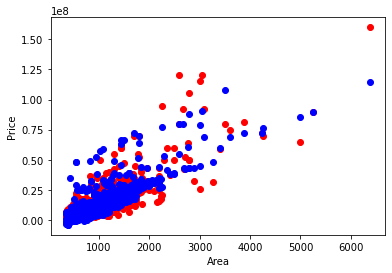

In [54]:
#comparing test values and predicted values
plt.scatter(X_test['Area'],y_test, color = 'red')
plt.scatter(X_test['Area'],y_pred, color = 'blue')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

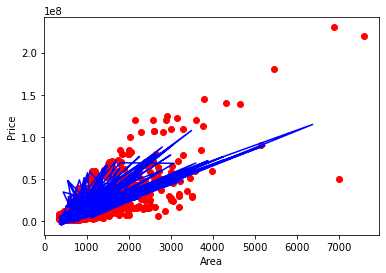

In [55]:
plt.scatter(X_train['Area'],y_train, color = 'red')
plt.plot(X_test['Area'],y_pred, color = 'blue')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

In [56]:
#saving our model using pickle
import pickle
with open('realestate_price_model_mumbai.pickle','wb') as f:
    pickle.dump(regressor,f)

In [57]:
#saving name of columns in json
import json
columns = {
    'data_columns': [col.lower() for col in X.columns]
}
with open('locations.json','w') as f:
    f.write(json.dumps(columns))